In [1]:
import numpy as np
import statistics 
import math
import matplotlib.pyplot as plt
mu, sigma = 0, 0.1 # mean and standard deviation
floats = np.random.normal(scale=3, size=100)
randomInts = np.round(floats)
print(randomInts)

#normal distrubution formula
def normdf(x, mean, sd): 
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom

def normdf2(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = np.exp(-( x - mean)**2/(2*var))
    return num/denom

[ 0. -2.  1.  0.  2.  0. -4.  3.  2.  2.  3. -3.  2.  2. -1. -0. -2. -2.
  0.  4.  5. -3.  1.  0.  4. -1. -1. -2. -2.  1. -2. -1. -1.  4.  1. -1.
 -3. -4. -3. -1. -2.  0. -4.  1.  1. -0.  3.  4. -3. -7. -3. -5.  0.  3.
 -2.  0.  0. -0. -2. -2.  4.  4. -1. -3. -2. -3.  4. -3. -3. -3.  2. -3.
  5.  0. -5. -0. -1.  2. -4.  2. -3.  3. -1. -0. -2.  8. -5.  4.  2. -4.
  3.  1.  3. -2. -1. -3.  1.  3.  3. -2.]


In [56]:
median = statistics.median(randomInts)
sigma = statistics.stdev(randomInts)
print("median:{}, sigma:{}".format(median, sigma))

median:0.0, sigma:2.770698048645445


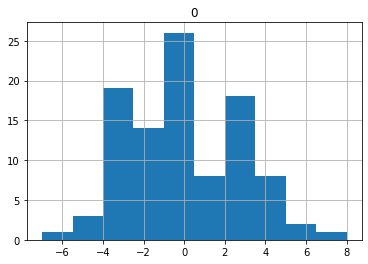

In [57]:
import pandas as pd
d=pd.DataFrame(randomInts)
data=d.hist()

In [74]:
hist={}
for el in randomInts:
    if el in hist: hist[int(el)]=hist[el]+1
    if el not in hist: hist[int(el)]=1
hist=dict(sorted(hist.items()))
hist_df=pd.DataFrame(hist.items(), columns=['x','y'])
hist_df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12
x,-7,-5,-4,-3,-2,-1,0,1,2,3,4,5,8
y,1,3,5,14,14,11,15,8,9,9,8,2,1


In [75]:
s1=""
s2=""
for i in range(-7,7): s1=s1+str(i)+" "; s2=s2+" "+str(round(normdf(i, median, sigma)*100))
ss1=[d for d in range(-7,7)]
ss2=[round(normdf(d, median, sigma)*100) for d in range(-7,7)]
normal_distribution=pd.DataFrame([ss1,ss2])
normal_distribution

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6
1,1,1,3,5,8,11,13,14,13,11,8,5,3,1


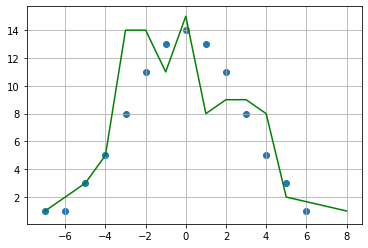

In [80]:
s2=[]
s1=[]
for i in range(-7,7): s2.append(round(normdf(i, median, sigma)*100)); s1.append(i)
#print(s2)
p=pd.DataFrame([s1,s2])
p=p.transpose()
p.columns = ['x', 'y']

plt.plot(hist_df['x'], hist_df['y'], color='green')
plt.scatter(x=p['x'], y=p['y'])
plt.grid()